In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1
print(customer)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [60]:
interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0
print(interarrival_time)

[0 8 7 5 6 6 4 7 3 1 3 1 2 7 8 8 6 5 3 8 8 3 5 2 6 2 8 5 1 1 2 6 8 3 7 8 2
 6 5 2 6 2 3 8 3 6 5 1 5 5 6 1 4 3 3 8 5 1 1 3 5 6 6 2 5 7 1 2 7 2 3 6 3 3
 3 8 4 5 1 3 8 1 1 6 4 1 7 5 1 3 6 6 4 4 1 2 3 7 2 8]


In [61]:
service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6
print(service_time)

[5. 4. 3. 5. 4. 3. 1. 4. 2. 4. 3. 4. 4. 3. 2. 3. 2. 3. 2. 2. 4. 3. 4. 4.
 3. 3. 1. 1. 1. 4. 2. 5. 2. 4. 1. 2. 4. 5. 5. 3. 3. 4. 2. 3. 6. 3. 4. 4.
 4. 4. 3. 3. 3. 2. 3. 5. 3. 3. 2. 6. 2. 2. 2. 6. 4. 4. 5. 3. 3. 2. 2. 1.
 3. 1. 4. 6. 1. 1. 4. 3. 4. 4. 1. 3. 2. 3. 3. 5. 3. 4. 6. 4. 4. 2. 6. 3.
 3. 5. 2. 1.]


In [62]:
arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]
print(arrival_time)

[  0.   8.  15.  20.  26.  32.  36.  43.  46.  47.  50.  51.  53.  60.
  68.  76.  82.  87.  90.  98. 106. 109. 114. 116. 122. 124. 132. 137.
 138. 139. 141. 147. 155. 158. 165. 173. 175. 181. 186. 188. 194. 196.
 199. 207. 210. 216. 221. 222. 227. 232. 238. 239. 243. 246. 249. 257.
 262. 263. 264. 267. 272. 278. 284. 286. 291. 298. 299. 301. 308. 310.
 313. 319. 322. 325. 328. 336. 340. 345. 346. 349. 357. 358. 359. 365.
 369. 370. 377. 382. 383. 386. 392. 398. 402. 406. 407. 409. 412. 419.
 421. 429.]


In [63]:
time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

In [64]:
waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

In [65]:
data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

output = pd.DataFrame(data)

output

,customer,interarrival_time,arrival_time,service_time,time_service_begins,waiting_time,time_service_ends,time_in_system,idle_time_server
0,1,0,0,5,0,0,5,0,0
1,2,8,8,4,8,0,12,4,3
2,3,7,15,3,15,0,18,3,3
3,4,5,20,5,20,0,25,5,2
4,5,6,26,4,26,0,30,4,1
...,...,...,...,...,...,...,...,...,...
95,96,2,409,3,416,7,419,10,0
96,97,3,412,3,419,7,422,10,0
97,98,7,419,5,422,3,427,8,0
98,99,2,421,2,427,6,429,8,0


In [66]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1

interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0

service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6

arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

# output = pd.DataFrame(data)

# output

# output.describe()

probability_of_idle_server = np.sum(idle_time_server)/time_service_ends[99]
print(probability_of_idle_server)

0.302771855010661


In [67]:
# 50 trials

average_waiting_time = np.zeros(50)
for trial in range(50):
    customer = np.zeros(100)
    for i in range(100):
        customer[i] = i+1

    interarrival_time = np.random.randint(1, high=9, size=(100))
    interarrival_time[0] = 0

    service_time = np.zeros(100)
    for i in range(100):
        a = np.random.rand()
        if a < 0.1:
            service_time[i] = 1
        elif a < 0.3:
            service_time[i] = 2
        elif a < 0.6:
            service_time[i] = 3
        elif a < 0.85:
            service_time[i] = 4
        elif a < 0.95:
            service_time[i] = 5
        else:
            service_time[i] = 6

    arrival_time = np.zeros(100)
    for i in range(1,100):
        arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

    time_service_begins = np.zeros(100)
    time_service_ends = np.zeros(100)
    time_service_ends[0] = time_service_begins[0] + service_time[0]
    for i in range(1,100):
        time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
        time_service_ends[i] = time_service_begins[i] + service_time[i]

    waiting_time = np.zeros(100)
    time_in_system = np.zeros(100)
    idle_time_server = np.zeros(100)
    for i in range(1,100):
        waiting_time[i] = time_service_begins[i] - arrival_time[i]
        time_in_system[i] = time_service_ends[i] - arrival_time[i]
        idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

    data = {
        'customer': customer.astype(int),
        'interarrival_time': interarrival_time.astype(int),
        'arrival_time': arrival_time.astype(int),
        'service_time': service_time.astype(int),
        'time_service_begins': time_service_begins.astype(int),
        'waiting_time': waiting_time.astype(int),
        'time_service_ends': time_service_ends.astype(int),
        'time_in_system': time_in_system.astype(int),
        'idle_time_server': idle_time_server.astype(int)
    }

    average_waiting_time[trial] = np.sum(waiting_time)/100

In [68]:
print(average_waiting_time)

[1.36 1.2  1.5  2.86 1.03 3.46 1.23 1.14 1.75 1.03 1.12 0.98 2.38 1.54
 1.32 2.29 1.39 1.15 2.   1.19 1.18 3.21 1.95 1.05 0.9  1.57 0.98 1.03
 1.32 1.23 1.   1.03 1.15 1.17 1.96 0.74 1.86 2.87 1.63 0.39 1.45 1.17
 0.7  1.34 1.55 3.7  1.63 0.88 2.67 0.73]


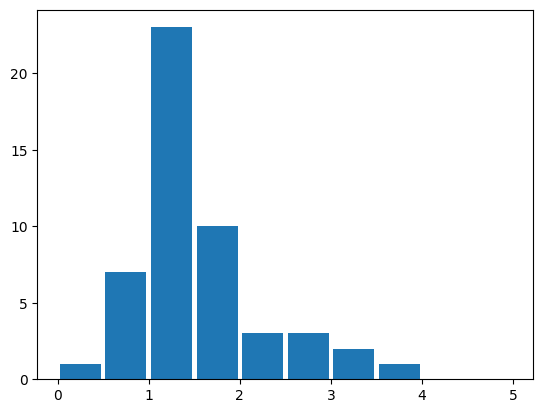

In [69]:
plt.hist(average_waiting_time, range=(0,5), rwidth = 0.9)
plt.show()